In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

In [4]:
frozen_model = 'frozen_inference_graph.pb'

In [5]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
classLables = []
file_name = 'lables.txt'
with open(file_name,'rt') as fpt:
    classLables = fpt.read().rstrip('\n').split('\n')

In [7]:
print(classLables)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0x7f80852ceb30>

<h1> IMG

In [9]:
img = cv2.imread('car.jpg')

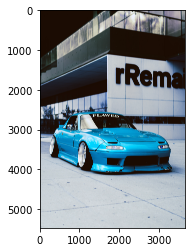

In [10]:
plt.imshow(img)

In [11]:
ClassIndex, confidence, bobx = model.detect(img,confThreshold=0.5)

In [12]:
print(ClassIndex)

[[3]]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bobx):
    cv2.rectangle(img,boxes,(255,0,0))
    cv2.putText(img,classLables[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0),thickness=10)

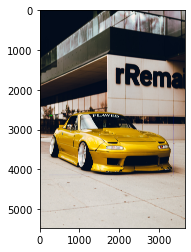

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [15]:
cam= cv2.VideoCapture(0)
cv2.namedWindow("CAMERA")
while True:
    ret,frame=cam.read()
    ClassIndex, confidence, bobx = model.detect(frame,confThreshold=0.5)
    font_scale = 3
    font = cv2.FONT_HERSHEY_PLAIN
    for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bobx):
        cv2.rectangle(frame,boxes,(255,0,0))
        cv2.putText(frame,classLables[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0),thickness=10)
    if not ret:
        break
    cv2.imshow("test",frame)
    k = cv2.waitKey(1)
    if k%265==27:
        break
    
cam.release()
cv2.destoryAllWindows()

IndexError: list index out of range